In [49]:
'''
We create a class that represent the fliping of a single coin 10 times.
It istores v (as described in the book) and the amount of heads (represented by ones)
'''
from operator import attrgetter
import random
import matplotlib.pyplot as plt

class coin:
    def __init__(self):
        self.flips = [random.randint(0,1) for _ in range(10)]
        self.v = sum(self.flips) / 10

'''
We flip a thousand coins 10 times independently. The coins and their attributes
are saved within t_coin
'''
t_coin = [coin() for _ in range(1000)]

'''
We select the coins c_1, c_min and c_rand as demanded in the exercice
'''
c_1 = t_coin[0]
c_min = min(t_coin, key = attrgetter('v'))
c_rand = t_coin[random.randint(0,999)]

# u in this case is nothing more than the additon of all the v's for each coin devided by 1000

print("These are v_1 = {}, v_min ={}, v_rand = {} and u = {}"
      .format(c_1.v,c_min.v,c_rand.v,sum(i.v for i in t_coin)/1000))

These are v_1 = 0.5, v_min =0.0, v_rand = 0.5 and u = 0.5034000000000002


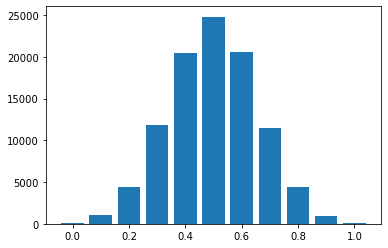

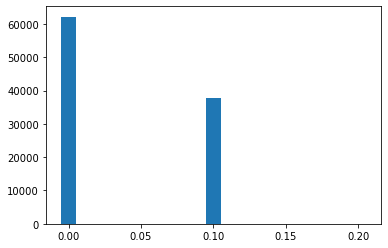

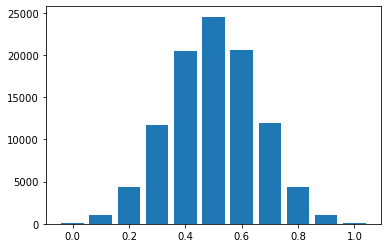

In [46]:
#We now repeat the experiment 10000 times
dic_1 = {}
dic_min = {}
dic_rand = {}
it = 0
for _ in range(0,100000):
    it += 1
    print("iteración: {}".format(it), end='\r')
    t_coin = [coin() for _ in range(1000)]
    c_1 = t_coin[0]
    c_min = min(t_coin, key = attrgetter('v'))
    c_rand = t_coin[random.randint(0,999)]
    
    if c_min.v < 0 or c_1.v < 0 or c_rand.v < 0:
        print("v_min = {}, v_1 = {}, v_rand = {}".format(c_min.v, c_1.v, c_rand.v))
        break
    
    if c_1.v in dic_1:
        dic_1[c_1.v] += 1
    else:
        dic_1[c_1.v] = 1
        
    if c_min.v in dic_min:
        dic_min[c_min.v] += 1
    else:
        dic_min[c_min.v] = 1
        
    if c_rand.v in dic_rand:
        dic_rand[c_rand.v] += 1
    else:
        dic_rand[c_rand.v] = 1
#We plot the distribution of v_1
plt.bar(dic_1.keys(), dic_1.values(), 0.08)
plt.show()
#We plot the distribution of v_min
plt.bar(dic_min.keys(), dic_min.values(), 0.01)
plt.show()
#We plot the distribution of v_rand
plt.bar(dic_rand.keys(), dic_rand.values(), 0.08)
plt.show()

In [51]:
'''
We see here that c_rand and c_1 fit nicely into what one would expect if they followed Hoeffding's Law.
C_min does not follow it, reason being C_min does not follow a binomial distribution. 
We take u to be 0.5 aprox, and we observe that for \sigma > 0, P(|v-u|<\sigma) is nothing more than 
P'(v>u+\Sigma) + P'(v < u - \sigma) where P' is a binomial distribution with parameters p=u and n=10.
I do not distinguish between c_1 and c_rand because they are equally distriburted.
We can approximate a Binomial distribution by stablishing a Normal distribution P'' ~ N(0,2.5) where 0.25 is the variance.
Now, P'' is not centered around u, so P''(X > x) = P'(X' > x + u ). We rewrite P(|v-u|<\sigma)
P(|v-u|<\sigma) = P''(v> \Sigma) + P''(v < - \sigma)
But P''(v> \Sigma) = P''(v < - \sigma), then P(|v-u|<\sigma) = 2P''(v < -\Sigma)
This fits nicely with Hoeffding's Law, since P''(v < \Sigma) <= 2 * e^{-2 * {\sigma^2} * 10}.

We can relate this problem with the bin problem. For each coin we select 10 marbles; red if we got heads, green
if we get tails. If we assume there is replacement, the two problems are identical by virtue of this correspondence.

'''

"\nWe see here that c_rand and c_1 fit nicely into what one would expect if they followed Hoeffding's Law.\nC_min does not follow it, reason being C_min does not follow a binomial distribution. \nWe take u to be 0.5 aprox, and we observe that for \\sigma > 0, P(|v-u|<\\sigma) is nothing more than \nP'(v>u+\\Sigma) + P'(v < u - \\sigma) where P' is a binomial distribution with parameters p=u and n=10.\nI do not distinguish between c_1 and c_rand because they are equally distriburted.\nWe can approximate a Binomial distribution by stablishing a Normal distribution P'' ~ N(0,2.5) where 0.25 is the variance.\nNow, P'' is not centered arrown u, so P''(X > x) = P'(X' > x + u ). We rewrite P(|v-u|<\\sigma)\nP(|v-u|<\\sigma) = P''(v> \\Sigma) + P''(v < - \\sigma)\n"

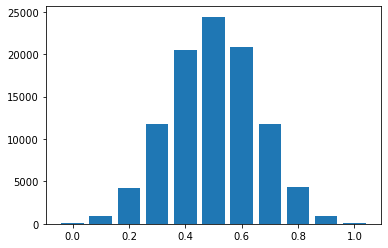

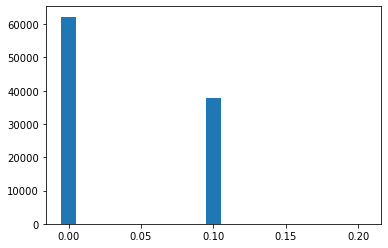

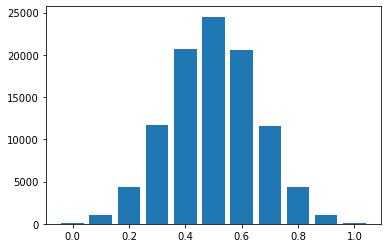

In [57]:
#For the sake of programming. Is there a more elegant way of doing this exercice?
bdic_1 ={}
bdic_rand = {}
bdic_min = {}
it = 1
while it < 100000:
    print("iteración: {}".format(it+1), end='\r')
    bt_coins = [sum(random.randint(0,1) for _ in range(10)) / 10 for _ in range(1000)]
    bc_1 = bt_coins[0]
    bc_rand = bt_coins[random.randint(0,999)]
    bc_min = min(bt_coins)
    
    if bc_1 in bdic_1:
        bdic_1[bc_1] += 1
    else:
        bdic_1[bc_1] = 1
        
    if bc_rand in bdic_rand:
        bdic_rand[bc_rand] += 1
    else:
        bdic_rand[bc_rand] = 1
    
    if bc_min in bdic_min:
        bdic_min[bc_min] += 1
    else:
        bdic_min[bc_min] = 1
    it += 1
        
#We plot the distribution of v_1
plt.bar(bdic_1.keys(), bdic_1.values(), 0.08)
plt.show()
#We plot the distribution of v_min
plt.bar(bdic_min.keys(), bdic_min.values(), 0.01)
plt.show()
#We plot the distribution of v_rand
plt.bar(bdic_rand.keys(), bdic_rand.values(), 0.08)
plt.show()

In [ ]:
#It might be simpler, but the amount of time I saved was minimal. I think this code is less readable though